## Repaso

Sobre el dataset de startups:

1) ¿Qué % de los ingresos aumenta si aumentamos una unidad el gasto en I+D?, ¿Que pasaría si invertimos $1M en R&D en términos de ingresos?

Nota: 

  1) Hacemos este ejercicio usando uno y dos estimadores (x)
  2) Nuestro objetivo es la interpretación, no hace falta dividir el conjunto en train y test 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm


dataset = pd.read_csv('../data/50_Startups.csv')
dataset = pd.get_dummies(dataset, drop_first=True)

# Convert boolean columns to int (0/1)
dataset['State_Florida'] = dataset['State_Florida'].astype(int)
dataset['State_New York'] = dataset['State_New York'].astype(int)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


Correlograma

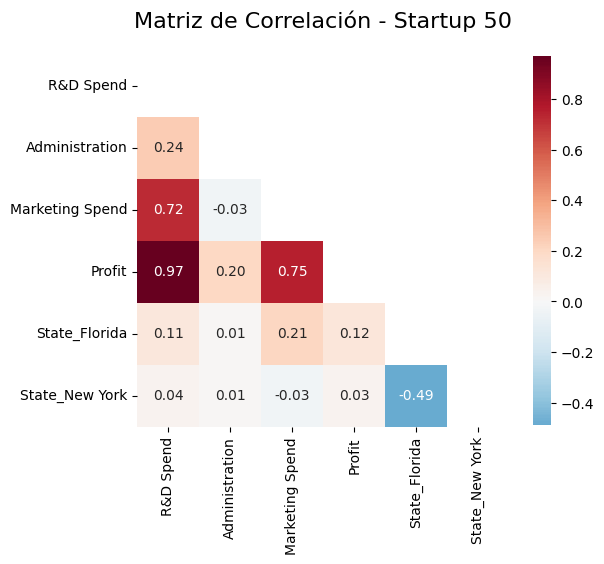

In [55]:
correlation_matrix = dataset.corr().round(2)
# Visualizar la matriz de correlación
plt.figure(figsize=(6, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Startup 50', fontsize=16, pad=20)
plt.show()

Construimos el target y Creamos los datasets

In [56]:
X=dataset[["R&D Spend", "Marketing Spend"]]
print(X.shape)
y=np.log(dataset["Profit"])

print(y.shape)
print(X.shape)

(50, 2)
(50,)
(50, 2)


In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)


In [58]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
rd_coef_modelo=model.coef_
print(rd_coef_modelo)
b1=rd_coef_modelo[0]

[7.81615612e-06 5.32653021e-07]


## Ahora predecimos valor cuando X = 1,000,000
x_prueba=(1000000,1)
prediction_1M=

In [60]:
porc_aumento_profit=(np.exp(b1)-1)*100
print(f"{porc_aumento_profit:.4f}% por cada unidad de aumento en X1")
print(f"{porc_aumento_profit*1000:.4f}% por cada 1000 dolares de aumento en X1")
print(f"{porc_aumento_profit*1000000:.4f}% por cada 1000 dolares de aumento en X1")

0.0008% por cada unidad de aumento en X1
0.7816% por cada 1000 dolares de aumento en X1
781.6187% por cada 1000 dolares de aumento en X1
